In [20]:
import garminconnect
import datetime
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [4]:
from getpass import getpass

email = input("Enter email address: ")
password = getpass("Enter password: ")

garmin = garminconnect.Garmin(email, password)
garmin.login()

garmin.display_name

'105d6bc6-61ec-4587-ab7f-ae5183862d8e'

In [5]:
import os

# retrieve the value of the GARTH_HOME environment variable 
# (defaulting to ~/.garth if not set) and then uses the 
# garmin.garth.dump function to process that path.

GARTH_HOME = os.getenv("GARTH_HOME", "~/.garth")
garmin.garth.dump(GARTH_HOME)

In [6]:
from datetime import date, timedelta
import pandas as pd

# Define your target end date
end_date = date(2023, 12, 3) # miriam
#end_date = date(2023, 10, 17) #liza


# Calculate the start date as 2 weeks (14 days) before the end date
start_date = end_date - timedelta(days=14) # miriam
#start_date = end_date - timedelta(days=14) #liza

datelist = []

current_date = start_date
while current_date <= end_date:
    datelist.append(current_date)
    current_date += timedelta(days=1)

datelist_new = [x.isoformat() for x in datelist]

dataframes_list = []  # List to store each day's DataFrame

for day in datelist_new:
    current_entry = garmin.get_sleep_data(day)
    current_entry_df = pd.DataFrame([current_entry])  # Convert the dictionary to a DataFrame
    dataframes_list.append(current_entry_df)

# Concatenate all the DataFrames in the list
week_sleep_df = pd.concat(dataframes_list, ignore_index=True)

week_sleep_df


dailySleepDTO  \
0   {'id': 1700354760000, 'userProfilePK': 1167901...   
1   {'id': 1700440980000, 'userProfilePK': 1167901...   
2   {'id': 1700529240000, 'userProfilePK': 1167901...   
3   {'id': 1700619900000, 'userProfilePK': 1167901...   
4   {'id': 1700694420000, 'userProfilePK': 1167901...   
5   {'id': 1700785020000, 'userProfilePK': 1167901...   
6   {'id': 1700872920000, 'userProfilePK': 1167901...   
7   {'id': 1700959380000, 'userProfilePK': 1167901...   
8   {'id': 1701050220000, 'userProfilePK': 1167901...   
9   {'id': 1701135180000, 'userProfilePK': 1167901...   
10  {'id': 1701217260000, 'userProfilePK': 1167901...   
11  {'id': 1701303180000, 'userProfilePK': 1167901...   
12  {'id': 1701393900000, 'userProfilePK': 1167901...   
13  {'id': 1701480000000, 'userProfilePK': 1167901...   
14  {'id': None, 'userProfilePK': 116790139, 'cale...   

                                        sleepMovement remSleepData  \
0   [{'startGMT': '2023-11-18T23:46:00.0', 'endGMT...         True   
1   [{'startGMT': '2023-11-19T23:43:00.0', 'endGMT...         True   
2   [{'startGMT': '2023-11-21T00:14:00.0', 'endGMT...         True   
3   [{'startGMT': '2023-11-22T01:25:00.0', 'endGMT...         True   
4   [{'startGMT': '2023-11-22T22:07:00.0', 'endGMT...         True   
5   [{'startGMT': '2023-11-23T23:17:00.0', 'endGMT...         True   
6   [{'startGMT': '2023-11-24T23:42:00.0', 'endGMT...         True   
7   [{'startGMT': '2023-11-25T23:43:00.0', 'endGMT...         True   
8   [{'startGMT': '2023-11-27T00:57:00.0', 'endGMT...         True   
9   [{'startGMT': '2023-11-28T00:33:00.0', 'endGMT...         True   
10  [{'startGMT': '2023-11-28T23:21:00.0', 'endGMT...         True   
11  [{'startGMT': '2023-11-29T23:13:00.0', 'endGMT...         True   
12  [{'startGMT': '2023-12-01T00:25:00.0', 'endGMT...         True   
13  [{'startGMT': '2023-12-02T00:20:00.0', 'endGMT...         True   
14                                                 []         None   

                                          sleepLevels  \
0   [{'startGMT': '2023-11-19T00:46:00.0', 'endGMT...   
1   [{'startGMT': '2023-11-20T00:43:00.0', 'endGMT...   
2   [{'startGMT': '2023-11-21T01:14:00.0', 'endGMT...   
3   [{'startGMT': '2023-11-22T02:25:00.0', 'endGMT...   
4   [{'startGMT': '2023-11-22T23:07:00.0', 'endGMT...   
5   [{'startGMT': '2023-11-24T00:17:00.0', 'endGMT...   
6   [{'startGMT': '2023-11-25T00:42:00.0', 'endGMT...   
7   [{'startGMT': '2023-11-26T00:43:00.0', 'endGMT...   
8   [{'startGMT': '2023-11-27T01:57:00.0', 'endGMT...   
9   [{'startGMT': '2023-11-28T01:33:00.0', 'endGMT...   
10  [{'startGMT': '2023-11-29T00:21:00.0', 'endGMT...   
11  [{'startGMT': '2023-11-30T00:13:00.0', 'endGMT...   
12  [{'startGMT': '2023-12-01T01:25:00.0', 'endGMT...   
13  [{'startGMT': '2023-12-02T01:20:00.0', 'endGMT...   
14                                                 []   

                                 sleepRestlessMoments  restlessMomentsCount  \
0   [{'value': 1, 'startGMT': 1700358360000}, {'va...                  11.0   
1   [{'value': 1, 'startGMT': 1700442420000}, {'va...                  19.0   
2   [{'value': 2, 'startGMT': 1700531760000}, {'va...                  14.0   
3   [{'value': 1, 'startGMT': 1700623320000}, {'va...                  13.0   
4   [{'value': 1, 'startGMT': 1700696580000}, {'va...                  17.0   
5   [{'value': 1, 'startGMT': 1700786640000}, {'va...                  15.0   
6   [{'value': 1, 'startGMT': 1700874360000}, {'va...                  28.0   
7   [{'value': 1, 'startGMT': 1700959380000}, {'va...                  26.0   
8   [{'value': 1, 'startGMT': 1701050220000}, {'va...                  14.0   
9   [{'value': 1, 'startGMT': 1701138240000}, {'va...                  24.0   
10  [{'value': 1, 'startGMT': 1701220140000}, {'va...                  24.0   
11  [{'value': 1, 'startGMT': 1701304980000}, {'va...                  14.0   
12  [{'value': 1, 'startGMT': 1701394080000}, {'va...             

In [7]:
week_sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   dailySleepDTO                        15 non-null     object 
 1   sleepMovement                        15 non-null     object 
 2   remSleepData                         14 non-null     object 
 3   sleepLevels                          15 non-null     object 
 4   sleepRestlessMoments                 14 non-null     object 
 5   restlessMomentsCount                 14 non-null     float64
 6   wellnessEpochRespirationDataDTOList  14 non-null     object 
 7   sleepHeartRate                       14 non-null     object 
 8   sleepStress                          14 non-null     object 
 9   sleepBodyBattery                     14 non-null     object 
 10  hrvData                              14 non-null     object 
 11  avgOvernightHrv                   

In [8]:
# data from only one day
sleep_one_day = week_sleep_df.iloc[0]
sleep_one_day

dailySleepDTO                          {'id': 1700354760000, 'userProfilePK': 1167901...
sleepMovement                          [{'startGMT': '2023-11-18T23:46:00.0', 'endGMT...
remSleepData                                                                        True
sleepLevels                            [{'startGMT': '2023-11-19T00:46:00.0', 'endGMT...
sleepRestlessMoments                   [{'value': 1, 'startGMT': 1700358360000}, {'va...
restlessMomentsCount                                                                11.0
wellnessEpochRespirationDataDTOList    [{'startTimeGMT': 1700354760000, 'respirationV...
sleepHeartRate                         [{'value': 88, 'startGMT': 1700354760000}, {'v...
sleepStress                            [{'value': 28, 'startGMT': 1700354700000}, {'v...
sleepBodyBattery                       [{'value': 17, 'startGMT': 1700354700000}, {'v...
hrvData                                [{'value': 35.0, 'startGMT': 1700354763000}, {...
avgOvernightHrv      

In [9]:
def delete_untracked_nights(df):
    """Delete the untracked nights by using the restlessMomentsCount"""
    return df.dropna(subset=["restlessMomentsCount"]).reset_index(drop=True) # reset the index 

In [10]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [44]:
"""
recording frequencies:

sleepMovement: 60 seconds -------------------------------> datetime one day delayed?
remSleepData: bool for each night
sleepLevels: 60 seconds
sleepRestlessMoments: 60 seconds
restlessMomentsCount: one value for each night
wellnessEpochRespirationDataDTOList: 60 seconds
sleepHeartRate: 120 seconds
sleepStress: 180 seconds
sleepBodyBattery: 180 seconds
hrvData: 300 seconds
avgOvernightHrv: one value for each night
hrvStatus: None
restingHeartRate: one value for each night


timeseries data in expanded_df: sleepMovement, sleepLevels, sleepRestlessMoments, welnessEpochRespirationDataDTOList, sleepHeartRate, sleepStress, 
sleepBodyBattery, hrvData

constant values in expanded_df: remSleepData, restlessMomentsCount, avgOvernightHrv, hrvStatus(?), restingHeartRate

expanded_df["dailySleepDTO"]: extraction of time series data and feature data with different functions

"""



'\nrecording frequencies:\n\nsleepMovement: 60 seconds -------------------------------> datetime one day delayed?\nremSleepData: bool for each night\nsleepLevels: 60 seconds\nsleepRestlessMoments: 60 seconds\nrestlessMomentsCount: one value for each night\nwellnessEpochRespirationDataDTOList: 60 seconds\nsleepHeartRate: 120 seconds\nsleepStress: 180 seconds\nsleepBodyBattery: 180 seconds\nhrvData: 300 seconds\navgOvernightHrv: one value for each night\nhrvStatus: None\nrestingHeartRate: one value for each night\n\n\ntimeseries data in expanded_df: sleepMovement, sleepLevels, sleepRestlessMoments, welnessEpochRespirationDataDTOList, sleepHeartRate, sleepStress, \nsleepBodyBattery, hrvData\n\nconstant values in expanded_df: remSleepData, restlessMomentsCount, avgOvernightHrv, hrvStatus(?), restingHeartRate\n\nexpanded_df["dailySleepDTO"]: extraction of time series data and feature data with different functions\n\n'

In [11]:
week_sleep_df = delete_untracked_nights(week_sleep_df)
week_sleep_df

dailySleepDTO  \
0   {'id': 1700354760000, 'userProfilePK': 1167901...   
1   {'id': 1700440980000, 'userProfilePK': 1167901...   
2   {'id': 1700529240000, 'userProfilePK': 1167901...   
3   {'id': 1700619900000, 'userProfilePK': 1167901...   
4   {'id': 1700694420000, 'userProfilePK': 1167901...   
5   {'id': 1700785020000, 'userProfilePK': 1167901...   
6   {'id': 1700872920000, 'userProfilePK': 1167901...   
7   {'id': 1700959380000, 'userProfilePK': 1167901...   
8   {'id': 1701050220000, 'userProfilePK': 1167901...   
9   {'id': 1701135180000, 'userProfilePK': 1167901...   
10  {'id': 1701217260000, 'userProfilePK': 1167901...   
11  {'id': 1701303180000, 'userProfilePK': 1167901...   
12  {'id': 1701393900000, 'userProfilePK': 1167901...   
13  {'id': 1701480000000, 'userProfilePK': 1167901...   

                                        sleepMovement remSleepData  \
0   [{'startGMT': '2023-11-18T23:46:00.0', 'endGMT...         True   
1   [{'startGMT': '2023-11-19T23:43:00.0', 'endGMT...         True   
2   [{'startGMT': '2023-11-21T00:14:00.0', 'endGMT...         True   
3   [{'startGMT': '2023-11-22T01:25:00.0', 'endGMT...         True   
4   [{'startGMT': '2023-11-22T22:07:00.0', 'endGMT...         True   
5   [{'startGMT': '2023-11-23T23:17:00.0', 'endGMT...         True   
6   [{'startGMT': '2023-11-24T23:42:00.0', 'endGMT...         True   
7   [{'startGMT': '2023-11-25T23:43:00.0', 'endGMT...         True   
8   [{'startGMT': '2023-11-27T00:57:00.0', 'endGMT...         True   
9   [{'startGMT': '2023-11-28T00:33:00.0', 'endGMT...         True   
10  [{'startGMT': '2023-11-28T23:21:00.0', 'endGMT...         True   
11  [{'startGMT': '2023-11-29T23:13:00.0', 'endGMT...         True   
12  [{'startGMT': '2023-12-01T00:25:00.0', 'endGMT...         True   
13  [{'startGMT': '2023-12-02T00:20:00.0', 'endGMT...         True   

                                          sleepLevels  \
0   [{'startGMT': '2023-11-19T00:46:00.0', 'endGMT...   
1   [{'startGMT': '2023-11-20T00:43:00.0', 'endGMT...   
2   [{'startGMT': '2023-11-21T01:14:00.0', 'endGMT...   
3   [{'startGMT': '2023-11-22T02:25:00.0', 'endGMT...   
4   [{'startGMT': '2023-11-22T23:07:00.0', 'endGMT...   
5   [{'startGMT': '2023-11-24T00:17:00.0', 'endGMT...   
6   [{'startGMT': '2023-11-25T00:42:00.0', 'endGMT...   
7   [{'startGMT': '2023-11-26T00:43:00.0', 'endGMT...   
8   [{'startGMT': '2023-11-27T01:57:00.0', 'endGMT...   
9   [{'startGMT': '2023-11-28T01:33:00.0', 'endGMT...   
10  [{'startGMT': '2023-11-29T00:21:00.0', 'endGMT...   
11  [{'startGMT': '2023-11-30T00:13:00.0', 'endGMT...   
12  [{'startGMT': '2023-12-01T01:25:00.0', 'endGMT...   
13  [{'startGMT': '2023-12-02T01:20:00.0', 'endGMT...   

                                 sleepRestlessMoments  restlessMomentsCount  \
0   [{'value': 1, 'startGMT': 1700358360000}, {'va...                  11.0   
1   [{'value': 1, 'startGMT': 1700442420000}, {'va...                  19.0   
2   [{'value': 2, 'startGMT': 1700531760000}, {'va...                  14.0   
3   [{'value': 1, 'startGMT': 1700623320000}, {'va...                  13.0   
4   [{'value': 1, 'startGMT': 1700696580000}, {'va...                  17.0   
5   [{'value': 1, 'startGMT': 1700786640000}, {'va...                  15.0   
6   [{'value': 1, 'startGMT': 1700874360000}, {'va...                  28.0   
7   [{'value': 1, 'startGMT': 1700959380000}, {'va...                  26.0   
8   [{'value': 1, 'startGMT': 1701050220000}, {'va...                  14.0   
9   [{'value': 1, 'startGMT': 1701138240000}, {'va...                  24.0   
10  [{'value': 1, 'startGMT': 1701220140000}, {'va...                  24.0   
11  [{'value': 1, 'startGMT': 1701304980000}, {'va...                  14.0   
12  [{'value': 1, 'startGMT': 1701394080000}, {'va...                  34.0   
13  [{'value': 1, 'startGMT': 1701483240000}, {'va...                  19.0   

                  wellnessEpochRespirationDataDTOList  \
0   [{'startTimeGMT': 170035476000

In [12]:
# iterate over week_sleep_df Dataframe, extract values*, resample and write them in a DataFrame/Numpy Array with a .datetime value as column names
# * used values: sleepRestlessMoments, hrvData, sleepBodyBattery, sleepStress, sleepHeartRate, wellnessEpochRespirationDTOList, sleep Levels
# hrvStatus was excluded since it's only value is "None"
# dailySleepDTO was excluded since we planned to write different functions to extract the feature and timeseries data of dailySleepDTO, before using it in this function

# process in one batch because of similar format: 
# startGMT: sleepRestlessMoments, hrvData, sleepBodyBattery, sleepStress, sleepHeartRate
# startTimeGMT: welnessEpochRespirationDataDTOList
# startGMT - endGMT: sleepLevels
def featurevector_timeseries(week_sleep_df):
    #preliminary_featurevector_allnights = pd.DataFrame()
    preliminary_featurevector_allnights = pd.DataFrame(index=["sleepRestlessMoments", "hrvData", "sleepStress", "sleepBodyBattery", "sleepHeartRate", "wellnessEpochRespirationDataDTOList", "sleepLevels"])
    # iterate over indeces of week_sleep_df to only process one day at a time
    for i in week_sleep_df.index:
        # initialize empty Dataframe. This will be filled line by line with each iteration, adding a different feature in each row
        preliminary_featurevector = pd.DataFrame()
        sleep_one_day = week_sleep_df.iloc[i]
        # columns that use "startGMT" as name for their timecolumn
        columns_startGMT = ["sleepRestlessMoments", "hrvData", "sleepStress", "sleepBodyBattery", "sleepHeartRate"]
        # # columns that have one single value for the whole night
        # static_columns = ["remSleepData", "restlessMomentsCount", "avgOvernightHrv", "restingHeartRate"]
        # iterate over different columns
        for c in columns_startGMT:
            column_df = [pd.json_normalize(item) for item in sleep_one_day[c]]
            column_df = pd.concat(column_df, ignore_index=True)
            
            column_df["Real Time"] = [datetime.datetime.fromtimestamp(i) for i in column_df["startGMT"] / 1000]
            column_df["Real Time"] = pd.to_datetime(column_df["Real Time"])
            # make Real Time the index of the dataframe
            column_df.index = column_df["Real Time"]
            del column_df["Real Time"]
            del column_df["startGMT"]
            column_df = column_df.rename(columns = {column_df.columns[0]: c})
                    
            # resample: insert timesteps for each minute
            column_df_interpolate = column_df.resample('T').mean()
            # interpolate values to fill the new, empty time steps
            column_df_interpolate[c] = column_df_interpolate[c].interpolate()
            # drop unneeded columns, swap axes
            column_df_interpolate_transposed = column_df_interpolate.T
            # add to feature vector
            preliminary_featurevector = pd.concat([preliminary_featurevector, column_df_interpolate_transposed], axis=0)

            #preliminary_featurevector = preliminary_featurevector.rename(index={((len(preliminary_featurevector.index))-1): c})
            
        # sleep_one_day["wellnessEpochRespirationDataDTOList"] uses "startTimeGMT" as name for their time columns, so it has to be processed separately
        wellnessEpochRespiration_df = [pd.json_normalize(item) for item in sleep_one_day["wellnessEpochRespirationDataDTOList"]]
        wellnessEpochRespiration_df = pd.concat(wellnessEpochRespiration_df, ignore_index=True)
        
        wellnessEpochRespiration_df["Real Time"] = [datetime.datetime.fromtimestamp(i) for i in wellnessEpochRespiration_df["startTimeGMT"] / 1000]
        wellnessEpochRespiration_df["Real Time"] = pd.to_datetime(wellnessEpochRespiration_df["Real Time"])
        wellnessEpochRespiration_df.index = wellnessEpochRespiration_df["Real Time"]
        del wellnessEpochRespiration_df["Real Time"]
        del wellnessEpochRespiration_df["startTimeGMT"]
        wellnessEpochRespiration_df = wellnessEpochRespiration_df.rename(columns = {wellnessEpochRespiration_df.columns[0]: "wellnessEpochRespirationDataDTOList"})
        
        wellnessEpochRespiration_df_interpolate = wellnessEpochRespiration_df.resample('T').mean()
        wellnessEpochRespiration_df_interpolate['wellnessEpochRespirationDataDTOList'] = wellnessEpochRespiration_df_interpolate['wellnessEpochRespirationDataDTOList'].interpolate()
        wellnessEpochRespiration_df_interpolate_transposed = wellnessEpochRespiration_df_interpolate.T
        preliminary_featurevector = pd.concat([preliminary_featurevector, wellnessEpochRespiration_df_interpolate_transposed], axis=0)
        
        # # add the features with static values
        # for s in static_columns:
        #     preliminary_featurevector.loc[len(preliminary_featurevector.index)] = sleep_one_day[s]
        #     preliminary_featurevector = preliminary_featurevector.rename(index={((len(preliminary_featurevector.index))-1): s})


        # in sleep_one_day['sleepLevels'] the sleep levels are displayed in intervalls from startGMT to endGMT
        # .ffil was used for forward filling, so that all timesteps (per minute) in the interval would have the same value
        sleepLevels_df = [pd.json_normalize(item) for item in sleep_one_day['sleepLevels']]
        sleepLevels_df = pd.concat(sleepLevels_df, ignore_index=True)
        
        sleepLevels_df["startGMT"] = pd.to_datetime(sleepLevels_df["startGMT"])
        sleepLevels_df.index = sleepLevels_df["startGMT"]
        del sleepLevels_df["startGMT"]
        del sleepLevels_df["endGMT"]
        sleepLevels_df = sleepLevels_df.rename(columns = {sleepLevels_df.columns[0]: "sleepLevels"})
        #.ffil -> forward fill, replace all NaN values with the last numeric value that occured
        sleepLevels_ffil = sleepLevels_df.resample("T").ffill()
        sleepLevels_ffil = sleepLevels_ffil.T
        preliminary_featurevector = pd.concat([preliminary_featurevector, sleepLevels_ffil], axis=0)
        preliminary_featurevector_allnights = preliminary_featurevector_allnights.merge(preliminary_featurevector, left_index=True, right_index=True)
        # preliminary_featurevector_allnights = pd.concat([preliminary_featurevector_allnights, preliminary_featurevector], axis=1)

    #preliminary_featurevector_allnights = preliminary_featurevector_allnights.dropna(axis=1)

    # replace all NaNs with 0
    preliminary_featurevector_allnights = preliminary_featurevector_allnights.fillna(0)
    # convert to numpy for usage as feature vector
    preliminary_featurevector_allnights_np = preliminary_featurevector_allnights.to_numpy()

    return preliminary_featurevector_allnights, preliminary_featurevector_allnights_np




In [13]:
featurevector_timeseries_pandas, featurevector_timeseries_numpy = featurevector_timeseries(week_sleep_df)

C:\Users\magra\AppData\Local\Temp\ipykernel_3320\542092709.py:82: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  preliminary_featurevector_allnights = preliminary_featurevector_allnights.merge(preliminary_featurevector, left_index=True, right_index=True)


In [14]:
featurevector_timeseries_pandas

2023-11-19 00:46:00  2023-11-19 00:47:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:48:00  2023-11-19 00:49:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:50:00  2023-11-19 00:51:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:52:00  2023-11-19 00:53:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:54:00  2023-11-19 00:55:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:56:00  2023-11-19 00:57:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:58:00  2023-11-19 00:59:00  \
sleepRestlessMoments                                 0.0      

In [29]:
featurevector_timeseries_numpy[0].shape

(7007,)

In [30]:
featurevector_timeseries_numpy.shape

(7, 7007)

In [31]:
# Create the model
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    n_jobs=-1,
    random_state=42,
    verbose=0)

# Fit the model
iso_forest.fit(featurevector_timeseries_numpy[0])

# Classify as outlier / no outlier
outlier_classification = iso_forest.predict(featurevector_timeseries_numpy[0])

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

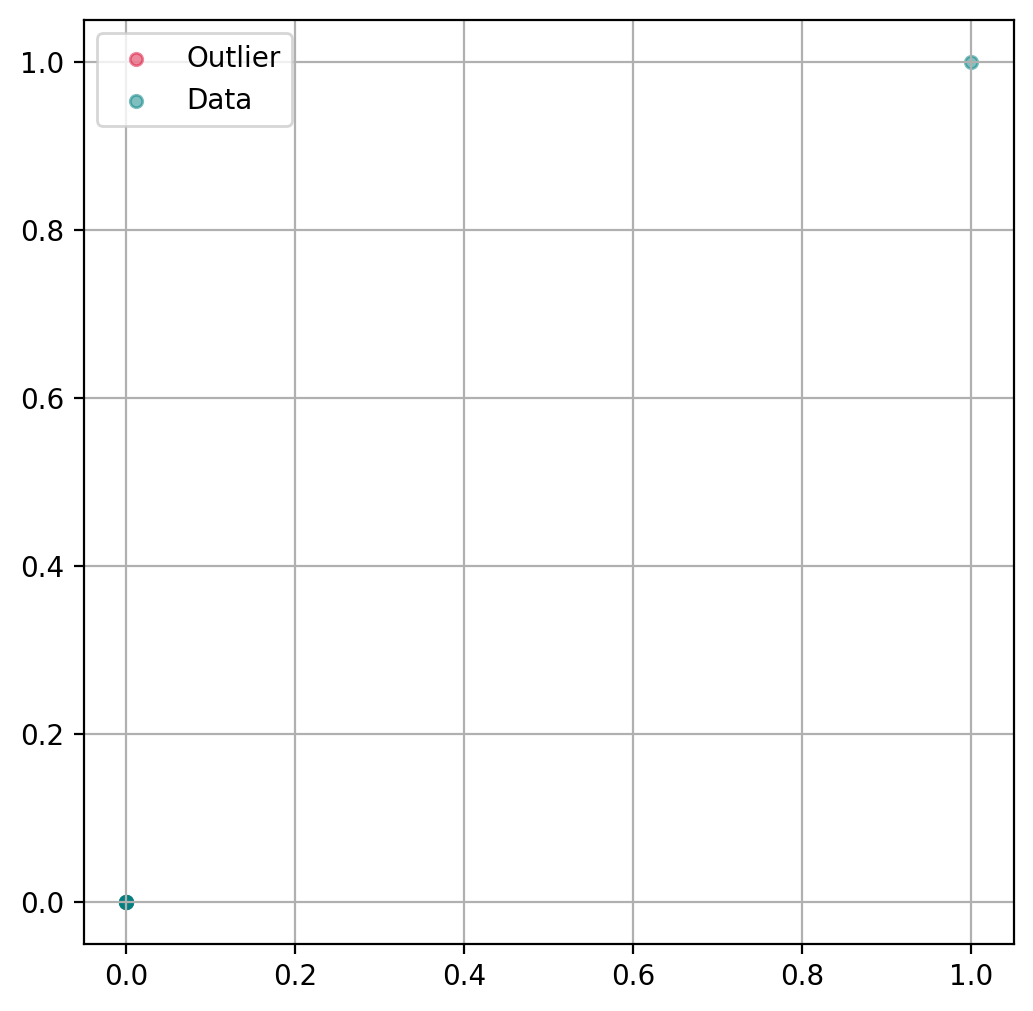

In [24]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)

# Scatter Plot: Outlier
mask = outlier_classification == -1
scatter = ax.scatter(featurevector_timeseries_numpy[mask, 0], featurevector_timeseries_numpy[mask, 1],
                     c="crimson",
                     alpha=0.5,
                     label="Outlier",
                     s=20)

# Data
scatter = ax.scatter(featurevector_timeseries_numpy[~mask, 0], featurevector_timeseries_numpy[~mask, 1],
                     c="teal",
                     alpha=0.5,
                     label="Data",
                     s=20)
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Predict degree of anomaly
scores_pred = iso_forest.decision_function(featurevector_timeseries_numpy)

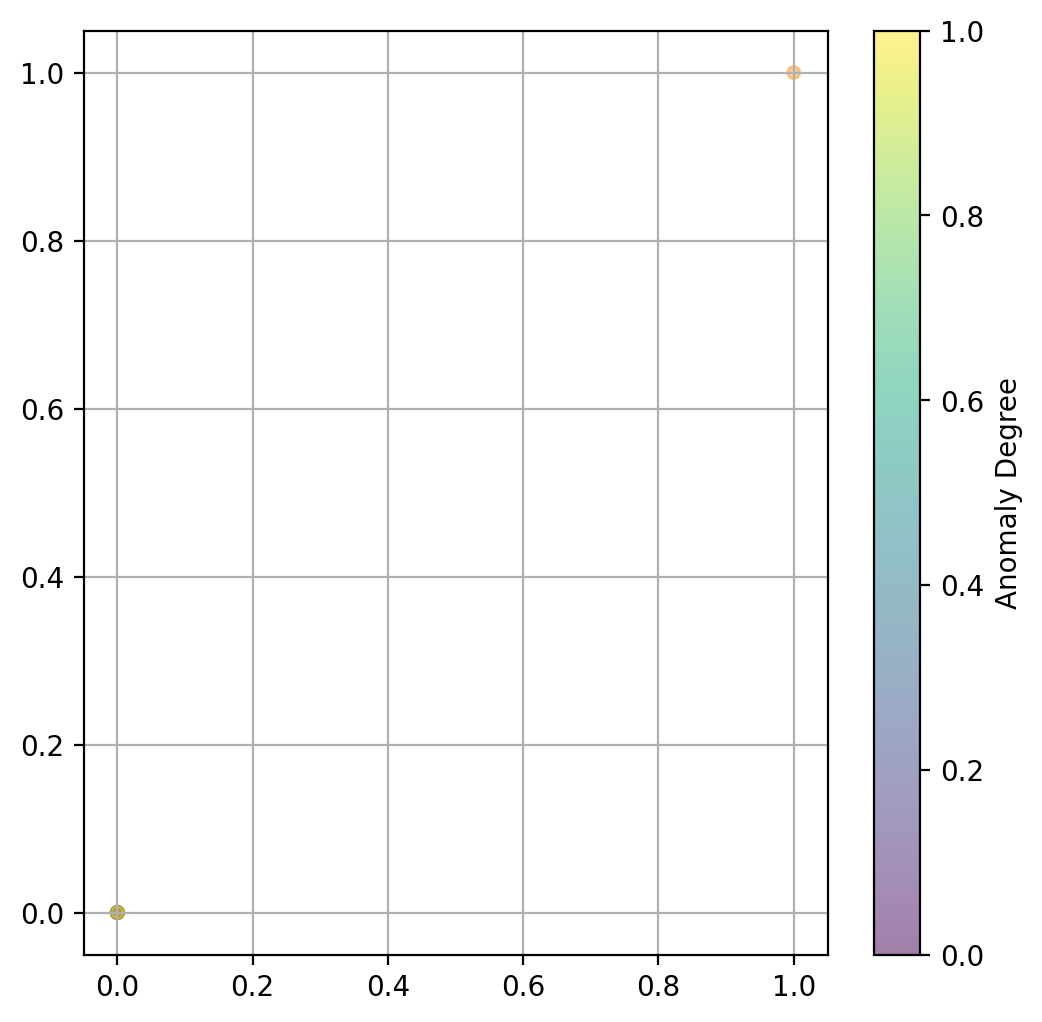

In [26]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
ax.scatter(featurevector_timeseries_numpy[:, 0], featurevector_timeseries_numpy[:, 1],
           c=scores_pred, cmap="plasma",
           alpha=0.5,
           s=20)

# Adding a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Anomaly Degree')
plt.grid(True)
plt.show()

In [15]:
# divide featurevector_timeseries_pandas into separate dataframes for each night
def divide_into_single_nights(featurevector_timeseries_pandas):

    # convert index to datetime
    featurevector_timeseries_pandas.columns = pd.to_datetime(featurevector_timeseries_pandas.columns)
    # Set a threshold for the gap between timestamps (e.g., 8 hours)
    time_threshold = timedelta(hours=8)
    # List to store individual night dataframes
    night_dataframes = []
    current_night_df = pd.DataFrame(index=featurevector_timeseries_pandas.index)  # Initialize an empty DataFrame with index of featurevector
    previous_timestamp = None

    # Iterate through columns
    for timestamp in featurevector_timeseries_pandas.columns:
        # Check if there is a previous timestamp
        if previous_timestamp is not None:
            time_difference = timestamp - previous_timestamp
            # If the time difference is greater than the threshold, start a new dataframe
            if time_difference > time_threshold:
                if not current_night_df.empty:
                    # append dataframe for the previous night to list night_dataframes
                    night_dataframes.append(current_night_df.copy())
                # initialize empty dataframe for the new night, add column with the first timestamp of the new night
                current_night_df = pd.DataFrame(index=featurevector_timeseries_pandas.index, columns=[timestamp])
            else:
                # Otherwise, add the column to the current dataframe
                current_night_df[timestamp] = featurevector_timeseries_pandas[timestamp]

        previous_timestamp = timestamp

    # Append the last night dataframe
    if not current_night_df.empty:
        night_dataframes.append(current_night_df)

    return night_dataframes

In [16]:
night_dataframes = divide_into_single_nights(featurevector_timeseries_pandas)

C:\Users\magra\AppData\Local\Temp\ipykernel_3320\1307320708.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_night_df[timestamp] = featurevector_timeseries_pandas[timestamp]
C:\Users\magra\AppData\Local\Temp\ipykernel_3320\1307320708.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_night_df[timestamp] = featurevector_timeseries_pandas[timestamp]
C:\Users\magra\AppData\Local\Temp\ipykernel_3320\1307320708.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

In [89]:
len(night_dataframes)

14

In [91]:
len(night_dataframes)

14

In [90]:
print(night_dataframes[2].shape)

(7, 423)


In [92]:
print(type(night_dataframes[0]))

<class 'pandas.core.frame.DataFrame'>


In [93]:
print(night_dataframes[0])
print(night_dataframes[1])

                                     2023-11-19 00:47:00  2023-11-19 00:48:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery                                     0.0                  0.0   
sleepHeartRate                                       0.0                  0.0   
wellnessEpochRespirationDataDTOList                  0.0                  0.0   
sleepLevels                                          1.0                  1.0   

                                     2023-11-19 00:49:00  2023-11-19 00:50:00  \
sleepRestlessMoments                                 0.0                  0.0   
hrvData                                              0.0                  0.0   
sleepStress                                          0.0                  0.0   
sleepBodyBattery           

In [22]:
featurevector_timeseries_numpy

array([[ 0.        ,  0.        ,  0.        , ...,  1.83333333,
         2.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 52.6       ,
        54.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 20.33333333,
        19.66666667, 19.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 76.5       ,
        81.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 13.5       ,
        14.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
#preliminary_featurevector_allnights = pd.DataFrame()

def featurevector_staticvalues(week_sleep_df):

    preliminary_featurevector_allnights_staticvalues = pd.DataFrame(index=["remSleepData", "restlessMomentsCount", "avgOvernightHrv", "restingHeartRate"])
    for i in week_sleep_df.index:
        # initialize empty Dataframe. This will be filled line by line with each iteration, adding a different feature in each row
        preliminary_featurevector_static = pd.DataFrame()
        sleep_one_day = week_sleep_df.iloc[i]
        # columns that have one single value for the whole night
        static_columns = ["remSleepData", "restlessMomentsCount", "avgOvernightHrv", "restingHeartRate"]
    # add the features with static values
        data = []
        for s in static_columns:
            value = sleep_one_day[s]
            data.append(value)
            df = pd.DataFrame(data, columns=[i])
        counter = 0
        for d in static_columns:
            df = df.rename(index={(counter): d})
            counter = counter+1
            
        preliminary_featurevector_allnights_staticvalues = preliminary_featurevector_allnights_staticvalues.merge(df, left_index=True, right_index=True)
        preliminary_featurevector_allnights_staticvalues_np = preliminary_featurevector_allnights_staticvalues.to_numpy()

    return preliminary_featurevector_allnights_staticvalues, preliminary_featurevector_allnights_staticvalues_np
            

In [24]:
featurevector_staticvalues_pandas, featurevector_staticvalues_numpy = featurevector_staticvalues(week_sleep_df)

In [25]:
featurevector_staticvalues_pandas

0     1     2     3     4     5     6     7     8   \
remSleepData          True  True  True  True  True  True  True  True  True   
restlessMomentsCount  23.0  15.0  11.0  19.0  27.0  22.0  11.0  11.0  19.0   
avgOvernightHrv       47.0  44.0  42.0  46.0  44.0  47.0  37.0  37.0  42.0   
restingHeartRate      63.0  66.0  65.0  69.0  66.0  70.0  66.0  67.0  69.0   

                        9     10    11    12  
remSleepData          True  True  True  True  
restlessMomentsCount  14.0  13.0  17.0  15.0  
avgOvernightHrv       34.0  45.0  38.0  41.0  
restingHeartRate      64.0  72.0  62.0  65.0

In [26]:
featurevector_staticvalues_numpy

array([[True, True, True, True, True, True, True, True, True, True, True,
        True, True],
       [23.0, 15.0, 11.0, 19.0, 27.0, 22.0, 11.0, 11.0, 19.0, 14.0, 13.0,
        17.0, 15.0],
       [47.0, 44.0, 42.0, 46.0, 44.0, 47.0, 37.0, 37.0, 42.0, 34.0, 45.0,
        38.0, 41.0],
       [63.0, 66.0, 65.0, 69.0, 66.0, 70.0, 66.0, 67.0, 69.0, 64.0, 72.0,
        62.0, 65.0]], dtype=object)

#### from here on: only trial stuff

In [63]:
# divide featurevector_timeseries_pandas into separate dataframes for each night

# convert index to datetime
featurevector_timeseries_pandas.columns = pd.to_datetime(featurevector_timeseries_pandas.columns)
# Set a threshold for the gap between timestamps (e.g., 8 hours)
time_threshold = timedelta(hours=8)
# List to store individual night dataframes
night_dataframes = []
current_night_df = pd.DataFrame(index=featurevector_timeseries_pandas.index)  # Initialize an empty DataFrame with index of featurevector
previous_timestamp = None

In [65]:
# Iterate through columns
for timestamp in featurevector_timeseries_pandas.columns:
    # Check if there is a previous timestamp
    if previous_timestamp is not None:
        time_difference = timestamp - previous_timestamp
        # If the time difference is greater than the threshold, start a new dataframe
        if time_difference > time_threshold:
            if not current_night_df.empty:
                # append dataframe for the previous night to list night_dataframes
                night_dataframes.append(current_night_df.copy())
            # initialize empty dataframe for the new night, add column with the first timestamp of the new night
            current_night_df = pd.DataFrame(index=featurevector_timeseries_pandas.index, columns=[timestamp])
        else:
            # Otherwise, add the column to the current dataframe
            current_night_df[timestamp] = featurevector_timeseries_pandas[timestamp]

    previous_timestamp = timestamp

# Append the last night dataframe
if not current_night_df.empty:
    night_dataframes.append(current_night_df)

C:\Users\magra\AppData\Local\Temp\ipykernel_18132\410047993.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_night_df[timestamp] = featurevector_timeseries_pandas[timestamp]
C:\Users\magra\AppData\Local\Temp\ipykernel_18132\410047993.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  current_night_df[timestamp] = featurevector_timeseries_pandas[timestamp]
C:\Users\magra\AppData\Local\Temp\ipykernel_18132\410047993.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

In [44]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming df is your original dataframe
# Make sure to replace 'your_file.csv' with the actual file name or provide the dataframe directly

# Example DataFrame creation (replace this with your actual DataFrame)
data = {
    '2023-11-19 00:46:00': [0.0],
    '2023-11-19 00:47:00': [0.0],
    '2023-11-19 00:48:00': [0.0],
    '2023-11-19 00:49:00': [0.0],
    # ... other columns ...
    '2023-11-19 01:01:00': [0.0],
    '2023-11-19 23:48:00': [0.0],
    '2023-11-19 23:49:00': [0.0],
    
}

df = pd.DataFrame(data)

# Convert the index to datetime
df.columns = pd.to_datetime(df.columns)

# Set a threshold for the gap between timestamps (e.g., 8 hours)
time_threshold = timedelta(hours=8)

# List to store individual night dataframes
night_dataframes = []

current_night_df = pd.DataFrame(index=df.index)  # Initialize an empty DataFrame
previous_timestamp = None

# Iterate through columns
for timestamp in df.columns:
    # Check if there is a previous timestamp
    if previous_timestamp is not None:
        time_difference = timestamp - previous_timestamp
        # If the time difference is greater than the threshold, start a new dataframe
        if time_difference > time_threshold:
            if not current_night_df.empty:
                night_dataframes.append(current_night_df.copy())
            current_night_df = pd.DataFrame(index=df.index, columns=[timestamp])
        else:
            # Otherwise, add the column to the current dataframe
            current_night_df[timestamp] = df[timestamp]

    previous_timestamp = timestamp

# Append the last night dataframe
if not current_night_df.empty:
    night_dataframes.append(current_night_df)

In [ ]:
len(preliminary_featurevector)-1

In [ ]:
preliminary_featurevector.loc[len(preliminary_featurevector.index)] = sleep_one_day[s]
#preliminary_featurevector.rename(index={(len(preliminary_featurevector.index)),s})
preliminary_featurevector

In [ ]:
type(len(preliminary_featurevector.index)-1)

In [ ]:
print(s)
print(len(preliminary_featurevector)-1)
preliminary_featurevector = preliminary_featurevector.rename(index={((len(preliminary_featurevector.index))-1): "restingHeartRate"})
preliminary_featurevector

# preliminary_featurevector.rename(index={6: 'remSleepData'})

In [ ]:
columns = preliminary_featurevector.columns
columns[0]

In [ ]:
preliminary_featurevector.loc[len(preliminary_featurevector.index)] = sleep_one_day["remSleepData"]

In [ ]:
preliminary_featurevector.rename(index={6: 'remSleepData'})

In [ ]:
# constant values in expanded_df: remSleepData, restlessMomentsCount, avgOvernightHrv, hrvStatus(?), restingHeartRate

print(sleep_one_day["remSleepData"])
print(type(sleep_one_day["remSleepData"]))
print(sleep_one_day["restlessMomentsCount"])
print(type(sleep_one_day["restlessMomentsCount"]))
print(sleep_one_day["avgOvernightHrv"])
print(type(sleep_one_day["avgOvernightHrv"]))
print(sleep_one_day["restingHeartRate"])
print(type(sleep_one_day["restingHeartRate"]))

In [ ]:
sleepLevels_df = [pd.json_normalize(item) for item in sleep_one_day['sleepLevels']]
sleepLevels_df = pd.concat(sleepLevels_df, ignore_index=True)

sleepLevels_df.head(5)

In [ ]:

sleepLevels_df["startGMT"] = pd.to_datetime(sleepLevels_df["startGMT"])
print(type(sleepLevels_df["startGMT"]))

# sleepBodyBattery_dfs_copy = sleepBodyBattery_dfs.copy()
# sleepBodyBattery_dfs_copy["Real Time"] = pd.to_datetime(sleepBodyBattery_dfs_copy["Real Time"])
# sleepBodyBattery_dfs_copy.index = sleepBodyBattery_dfs_copy["Real Time"]
# #del sleepBodyBattery_dfs_copy["Real Time"]

In [ ]:
sleepLevels_df.index = sleepLevels_df["startGMT"]
sleepLevels_df.head(2)

In [ ]:
del sleepLevels_df["startGMT"]
del sleepLevels_df["endGMT"]

In [ ]:
sleepLevels_pad = sleepLevels_df.resample("T").ffill()
sleepLevels_pad.head(20)

In [ ]:
sleepLevels_pad = sleepLevels_pad.T
preliminary_featurevector = pd.concat([preliminary_featurevector, sleepLevels_pad], axis=0)

In [ ]:
preliminary_featurevector

In [ ]:
column_df_interpolate_transposed = column_df_interpolate.T.drop(index=('startGMT'))
preliminary_featurevector = pd.concat([preliminary_featurevector, column_df_interpolate_transposed], axis=0)

In [ ]:
sleepRestlessMoments_dfs = [pd.json_normalize(item) for item in sleep_one_day['sleepRestlessMoments']]
sleepRestlessMoments_dfs = pd.concat(sleepRestlessMoments_dfs, ignore_index=True)
sleepRestlessMoments_dfs['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in sleepRestlessMoments_dfs["startGMT"] / 1000]
sleepRestlessMoments_dfs.head(5)
sleepRestlessMoments_dfs.rename(columns = {"value": "other"})

In [ ]:
sleepHeartRate_dfs = [pd.json_normalize(item) for item in sleep_one_day['sleepHeartRate']]
sleepHeartRate_dfs = pd.concat(sleepHeartRate_dfs, ignore_index=True)
sleepHeartRate_dfs['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in sleepHeartRate_dfs["startGMT"] / 1000]
sleepHeartRate_dfs.head(5)

In [ ]:
hrvData_dfs = [pd.json_normalize(item) for item in sleep_one_day['hrvData']]
hrvData_dfs = pd.concat(hrvData_dfs, ignore_index=True)
hrvData_dfs['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in hrvData_dfs["startGMT"] / 1000]
hrvData_dfs.head(5)

In [ ]:
sleepLevels_dfs = [pd.json_normalize(item) for item in sleep_one_day['sleepLevels']]
sleepLevels_dfs = pd.concat(sleepLevels_dfs, ignore_index=True)
sleepLevels_dfs.head(5)

In [ ]:
sleepBodyBattery_dfs = [pd.json_normalize(item) for item in sleep_one_day['sleepBodyBattery']]
sleepBodyBattery_dfs = pd.concat(sleepBodyBattery_dfs, ignore_index=True)
sleepBodyBattery_dfs.head(5)

In [ ]:
sleepBodyBattery_dfs['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in sleepBodyBattery_dfs["startGMT"] / 1000]
sleepBodyBattery_dfs

In [ ]:
sleepBodyBattery_dfs_copy = sleepBodyBattery_dfs.copy()
sleepBodyBattery_dfs_copy["Real Time"] = pd.to_datetime(sleepBodyBattery_dfs_copy["Real Time"])
sleepBodyBattery_dfs_copy.index = sleepBodyBattery_dfs_copy["Real Time"]
#del sleepBodyBattery_dfs_copy["Real Time"]

In [ ]:
type(sleepBodyBattery_dfs["Real Time"])

In [ ]:
sleepBodyBattery_dfs_copy.head(5)

In [ ]:
sleepBodyBattery_dfs_interpolate = sleepBodyBattery_dfs_copy.resample('T').mean()
sleepBodyBattery_dfs_interpolate.head()

In [ ]:
sleepBodyBattery_dfs_interpolate['value'] = sleepBodyBattery_dfs_interpolate['value'].interpolate()
sleepBodyBattery_dfs_interpolate.head(20)

In [ ]:
sleepBodyBattery_dfs_interpolate_transposed = sleepBodyBattery_dfs_interpolate.T
sleepBodyBattery_dfs_interpolate_transposed

In [ ]:
sleepBodyBattery_dfs_interpolate_transposed_dropped = sleepBodyBattery_dfs_interpolate_transposed.drop(index=('startGMT')) 

In [ ]:
sleepBodyBattery_dfs_interpolate_transposed_dropped

In [ ]:
sleepStress_df = [pd.json_normalize(item) for item in sleep_one_day['sleepStress']]
sleepStress_df = pd.concat(sleepStress_df, ignore_index=True)
sleepStress_df['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in sleepStress_df["startGMT"] / 1000]
sleepStress_df.head(10)

In [ ]:
sleepStress_df_copy = sleepStress_df.copy()
sleepStress_df_copy["Real Time"] = pd.to_datetime(sleepStress_df_copy["Real Time"])
sleepStress_df_copy.index = sleepStress_df_copy["Real Time"]
del sleepStress_df_copy["Real Time"]

In [ ]:
sleepStress_df_interpolate = sleepStress_df_copy.resample('T').mean()
sleepStress_df_interpolate['value'] = sleepStress_df_interpolate['value'].interpolate()

In [ ]:
sleepStress_df_interpolate_transposed = sleepStress_df_interpolate.T

In [ ]:
sleepStress_df_interpolate_transposed_dropped = sleepStress_df_interpolate_transposed.drop(index=('startGMT')) 

In [ ]:
sleepStress_df_interpolate_transposed_dropped

In [ ]:
sleepBodyBattery_dfs_interpolate_transposed_dropped

In [ ]:
sleepBodyBattery_dfs_interpolate_transposed_dropped.rename(index={"value": "sleepBodyBattery"})

In [ ]:
new = pd.concat([sleepBodyBattery_dfs_interpolate_transposed_dropped, sleepStress_df_interpolate_transposed_dropped], axis=0)

In [ ]:
new

In [ ]:
sleepMovement_df = [pd.json_normalize(item) for item in sleep_one_day['sleepMovement']]
sleepMovement_df = pd.concat(sleepMovement_df, ignore_index=True)
sleepMovement_df.head(5)

In [ ]:
sleepMovement = week_sleep_df["sleepMovement"]
print(sleepMovement.info)
print(sleepMovement.shape)
print(type(sleepMovement[1][0]))

In [ ]:
difference = timestamp_datetime_end - timestamp_datetime_start
difference

In [ ]:
sleepMovement_dfs = [pd.json_normalize(item) for item in week_sleep_df['sleepMovement']]
sleepMovement_dfs = pd.concat(sleepMovement_dfs, ignore_index=True)
sleepMovement_dfs

In [ ]:
sleepHeartRate_dfs = [pd.json_normalize(item) for item in week_sleep_df['sleepHeartRate']]
sleepHeartRate_df = pd.concat(sleepHeartRate_dfs, ignore_index=True)
sleepHeartRate_df.head(5)

In [ ]:
sleepHeartRate_df['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in sleepHeartRate_df["startGMT"] / 1000]
sleepHeartRate_df.head(10)

In [ ]:
wellnessEpochRespirationDataDTOList_dfs = [pd.json_normalize(item) for item in week_sleep_df['wellnessEpochRespirationDataDTOList']]
wellnessEpochRespirationDataDTOList_df = pd.concat(wellnessEpochRespirationDataDTOList_dfs, ignore_index=True)
wellnessEpochRespirationDataDTOList_df

In [ ]:
wellnessEpochRespirationDataDTOList_df['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in wellnessEpochRespirationDataDTOList_df["startTimeGMT"] / 1000]
wellnessEpochRespirationDataDTOList_df.head(10)

In [ ]:
flattened_dfs = [pd.json_normalize(item) for item in week_sleep_df['sleepRestlessMoments']]
full_df = pd.concat(flattened_dfs, ignore_index=True)
full_df

In [ ]:
full_df['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in full_df["startGMT"] / 1000]
full_df.head(10)

In [ ]:
restingHeartRate = week_sleep_df["restingHeartRate"]
print(restingHeartRate.info)
print(restingHeartRate.shape)

In [ ]:
avgOvernightHrv = week_sleep_df["avgOvernightHrv"]
print(avgOvernightHrv.info)
print(avgOvernightHrv.shape)

In [ ]:
hrvStatus = week_sleep_df["hrvStatus"]
print(hrvStatus.info)
print(hrvStatus.shape)

In [ ]:
flattened_dfs = [pd.json_normalize(item) for item in week_sleep_df['hrvData']]
full_df = pd.concat(flattened_dfs, ignore_index=True)
full_df

In [ ]:
import datetime
pd.set_option("display.max_rows", None)
full_df['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in full_df["startGMT"] / 1000]
full_df.head(10)

In [ ]:
sleepBodyBattery = week_sleep_df["sleepBodyBattery"]
print(sleepBodyBattery.info)
print(sleepBodyBattery.shape)

In [ ]:
sleepHeartRate = week_sleep_df["sleepHeartRate"]
print(sleepHeartRate.info)
print(sleepHeartRate.shape)

In [ ]:
sleepStress = week_sleep_df["sleepStress"]
print(sleepStress.info)
print(sleepStress.shape)

In [ ]:
sleepHeartRate[0]

In [ ]:
wellessEpochRespirationDataDTOList = week_sleep_df["wellnessEpochRespirationDataDTOList"]
print(wellessEpochRespirationDataDTOList.info)
print(wellessEpochRespirationDataDTOList.shape)

In [ ]:
wellessEpochRespirationDataDTOList[0]

In [ ]:
restlessMomentsCount = week_sleep_df["restlessMomentsCount"]
print(restlessMomentsCount.info)
print(restlessMomentsCount.shape)


In [ ]:
sleepRestlessMoments = week_sleep_df["sleepRestlessMoments"]
print(sleepRestlessMoments.info)
print(sleepRestlessMoments.shape)
print(type(sleepRestlessMoments[1][0]))

In [ ]:
sleepRestlessMoments = pd.Series.to_frame(sleepRestlessMoments)
sleepRestlessMoments

In [ ]:
sleepRestlessMoments['Real Time'] = [datetime.datetime.fromtimestamp(i) for i in full_df["startGMT"] / 1000]
full_df

In [ ]:
remSleepData = week_sleep_df["remSleepData"]
print(remSleepData.info)
print(remSleepData.shape)
print(type(remSleepData))

In [ ]:
remSleepData

In [ ]:
dailysleep = week_sleep_df["dailySleepDTO"]
dailysleep[1]


In [ ]:
sleepLevels = week_sleep_df["sleepLevels"]
print(sleepLevels.info)
print(sleepLevels.shape)

In [ ]:
sleepLevels[1][0]
type(sleepLevels[1][0])

In [ ]:
sleepLevels[1]

In [ ]:
sleepLevels[1][0]